In [2]:
import scipy as sp
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.special import gamma
import matplotlib.pyplot as plt
from scipy.io import loadmat
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import csv

def Kernel_X(mean,sd,X,Y):
    return (norm.cdf(X[1], mean[0], sd)-norm.cdf(X[0], mean[0], sd))#*(norm.cdf(Y[1], mean[1], sd)-norm.cdf(Y[0], mean[1], sd))

def Lambda(punti_generatori, D, bv, X,Y, sd, M):
    vet = [D[m]*Kernel_X(punti_generatori[m],sd,X,Y) for m in range(M**2)]
    return bv*sum(vet)

def conta_occorsi(punti_generatori, sigma):
    #occorrenze = np.sum(np.all(punti_generatori[:, np.newaxis, :] == sigma, axis=2), axis=1)

    conteggi = np.zeros(len(punti_generatori))
    for i in range(len(punti_generatori)):
        elem = punti_generatori[i]
        for elem1 in sigma:
            if np.array_equal(elem, elem1):
                conteggi[i] += 1
    return conteggi

def unisci_a_coppie(vettore1, vettore2):
    # Assicurati che i vettori abbiano la stessa lunghezza
    if len(vettore1) != len(vettore2):
        raise ValueError("I due vettori devono avere la stessa lunghezza")

    # Unione a coppie
    vettore_unito = []
    for elemento1, elemento2 in zip(vettore1, vettore2):
        vettore_unito.append([elemento1, elemento2])

    return vettore_unito

In [3]:
months = []
with open('data/multi_months.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Salta la prima riga (presunta intestazione)
    for row in reader:
        months.append(row[0])

T = len(months)
print(T, months)

33 ['01-January-2018', '01-February-2018', '01-March-2018', '01-April-2018', '01-May-2018', '01-June-2018', '01-July-2018', '01-August-2018', '01-September-2018', '01-October-2018', '01-November-2018', '01-December-2018', '01-January-2019', '01-February-2019', '01-March-2019', '01-April-2019', '01-May-2019', '01-June-2019', '01-July-2019', '01-August-2019', '01-September-2019', '01-October-2019', '01-November-2019', '01-December-2019', '01-January-2020', '01-February-2020', '01-March-2020', '01-April-2020', '01-May-2020', '01-June-2020', '01-July-2020', '01-August-2020', '01-September-2020']


In [4]:
# Carica il file .mat
lat_vet = loadmat('data/multi_lat_vet.mat')
long_vet = loadmat('data/multi_long_vet.mat')

lat_vet = [lat_vet['lat_vet'][0][t][0] for t in range(T)]
long_vet = [long_vet['long_vet'][0][t][0] for t in range(T)]

Nt = [len(lat_vet[t]) for t in range(T)]

I = np.ones(33)

for t in range(T):
    if t%12 <= 6 or t%12==11:
        I[t] = 0

print(I)

#I = [??]
A = np.concatenate((np.zeros(11), np.ones(12), 2*np.ones(10)))

#A = np.arange(33)

print(A)

#sistemare I


[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [5]:
# Creazione di un DataFrame geopandas
#fig = plt.figure(figsize=(20, 10))
"""for t in range(T):
    plt.subplot(3, 12, t+1)
    df = gpd.GeoDataFrame(geometry=gpd.points_from_xy(long_vet[t], lat_vet[t]))

    # Tracciamento dei punti sulla mappa
    df.plot(marker='o', color='red', markersize=10)
    plt.title(f'obs: {months[t]}, {Nt[t]}')
    plt.xlabel('Longitudine')
    plt.ylabel('Latitudine')
    plt.axis('equal')

    # Mostra il grafico
    #plt.show()"""

"for t in range(T):\n    plt.subplot(3, 12, t+1)\n    df = gpd.GeoDataFrame(geometry=gpd.points_from_xy(long_vet[t], lat_vet[t]))\n\n    # Tracciamento dei punti sulla mappa\n    df.plot(marker='o', color='red', markersize=10)\n    plt.title(f'obs: {months[t]}, {Nt[t]}')\n    plt.xlabel('Longitudine')\n    plt.ylabel('Latitudine')\n    plt.axis('equal')\n\n    # Mostra il grafico\n    #plt.show()"

170
73
99
132
97
43
88
694
774
317
166
196
180
270
135
13
15
155
168
696
1174
1305
601
267
289
304
780
318
243
247
460
1878
1900


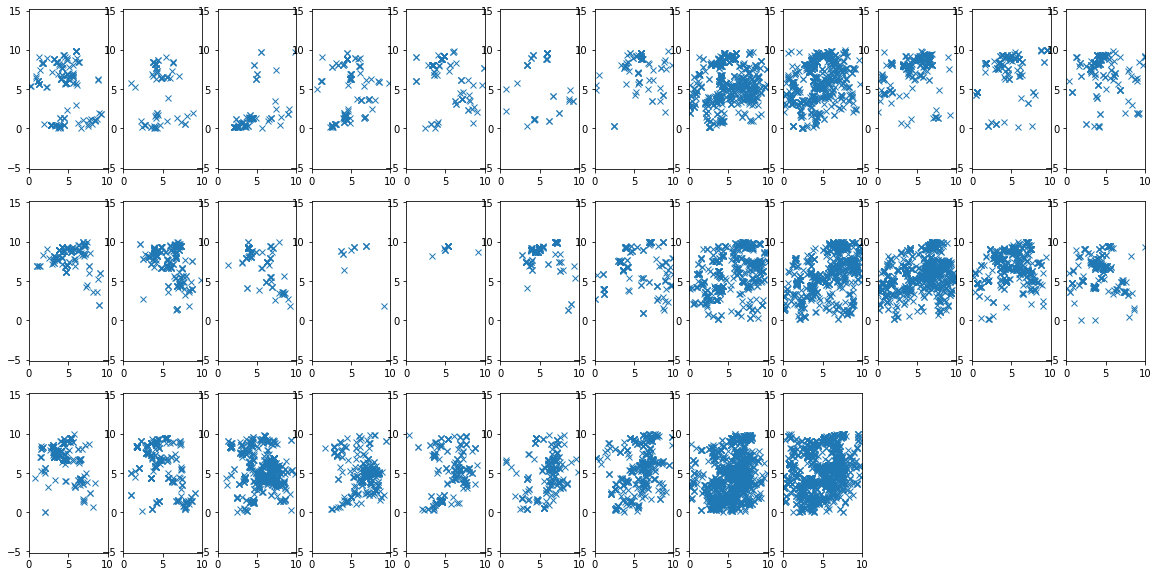

In [6]:
#stupid solution
#I will just traslate the coordinates "near the orgin" 
obs_x_vector = []
obs_y_vector = []
fig = plt.figure(figsize=(20, 10))
for t in range(T):
    
    lat = lat_vet[t]
    y_obs = (lat + 30*np.ones(np.size(lat)))#*1/10
    obs_y_vector.append(y_obs)

    long= long_vet[t]
    x_obs = (long + 65*np.ones(np.size(long)))#*1/10
    obs_x_vector.append(x_obs)


    
    plt.subplot(3, 12, t+1)
    plt.plot(x_obs, y_obs, "x")
    plt.axis('equal')

    print(np.size(lat))

    plt.xlim(0, 10)
    plt.ylim(0, 10)

plt.plot(np.arange(33), [Nt[t] for t in range(T)])
plt.show()

In [7]:
sd = 0.8
X = [0,10]
Y = [0,10]
M = 8 #square root of the number of locations
a = X[0]
b = X[1]
c = Y[0]
d = Y[1]

x = np.arange(a + (b-a)/(2*M),b,(b-a)/M)
x = np.tile(x, M)
y = np.arange(c + (d-c)/(2*M),d,(d-c)/M)
y = np.repeat(y, M)

punti_generatori = unisci_a_coppie(x, y)

In [8]:
#simulation

bv_guess = 1000
beta_guess = 0.05
eta0_guess = 1
eta1_guess = 1
eta2_guess = 0.2

it = 10000
sigma = [np.zeros((it,Nt[t],2)) for t in range(T)]
Dmcmc = [np.zeros([it,M**2]) for t in range(T)]
Bv = [np.zeros(it) for t in range(T)]
bv_curr = [bv_guess for t in range(T)]

Beta = np.zeros(it)
betacurr = beta_guess

Eta0 = np.zeros(it)
eta0curr = eta0_guess

Eta1 = np.zeros(it)
eta1curr = eta1_guess

Eta2 = np.zeros(it)
eta2curr = eta2_guess

alphacurr = [np.exp(eta0curr + I[t]*eta1curr + A[t]*eta2curr) for t in range(T)]

DD = [np.ones(M**2) for t in range(T)]

KK = [np.zeros([Nt[t],len(x)]) for t in range(T)] 

for t in range(T):
    for i in range(Nt[t]):
        KK[t][i][:] = norm.pdf(obs_x_vector[t][i],x,sd)*norm.pdf(obs_y_vector[t][i],y,sd)

Lambda_E = [np.zeros(it) for t in range(T)]

for t in range(T):
    Lambda_E[t][0] = Lambda(punti_generatori, DD[t], bv_curr[t], X,Y, sd, M)


Estimation_of_Nt = [np.zeros(it) for t in range(T)]
for t in range(T):
    Estimation_of_Nt[t][0] = alphacurr[t]/betacurr



U1 = [np.random.uniform(0,1,it) for t in range(T)]
U2 = np.random.uniform(0,1,it)
U3 = np.random.uniform(0,1,it)
U4 = np.random.uniform(0,1,it)

acc = 0
acc2 = 0
acc3 = 0
acc4 = 0

def prior_eta0(eta0fun):
    return norm.pdf(eta0fun, eta0_guess, 3/2*eta0_guess)

def prior_eta1(eta1fun):
    return norm.pdf(eta1fun, eta1_guess, 3/2*eta1_guess)

def prior_eta2(eta2fun):
    return norm.pdf(eta2fun, eta2_guess, 3/2*eta2_guess)

def logtarget(D,eta0,eta1,eta2, I, A, bv,M,beta,T,vs10):
    alphatot = [np.exp(eta0 + I[t]*eta1 + A[t]*eta2) for t in range(T)]
    alpha_m =  [1/(M**2)*np.exp(eta0 + I[t]*eta1 + A[t]*eta2) for t in range(T)]
    #alpha_l = alphatot/(M**2)

    if vs10 == 0:
        c1 = np.log(prior_eta0(eta0))
    elif vs10 == 1:
        c1 = np.log(prior_eta1(eta1)) 
    else:
        c1 = np.log(prior_eta2(eta2)) 

    argc2 = [(alphatot[t] - 1)*np.log(bv[t]) for t in range(T)]
    c2 = np.sum(argc2)

    c3 = np.sum(alphatot)*np.log(beta)

    c4 = sum(sum([alpha_m[t]*np.log(D[t]) for t in range(T)])) #sommo prima a t fissato per comodità
    
    c5 = (M**2)*sum(np.log(gamma(alpha_m)))
    return c1+c2+c3+c4-c5


#del alphatot, beta, D, bv, LL

for m in range(it):
    print(m)
    for t in range(T):
        N = Nt[t]
        #1
        for i in range(N):
            prob = DD[t]*KK[t][i,:]/sum(DD[t]*KK[t][i,:])
            punto = np.random.choice(M**2,p = prob)
            sigma[t][m,i] = punti_generatori[punto]

        #2
        conteggi = conta_occorsi(punti_generatori, sigma[t][m,:])
        #print("conteggi", conteggi)
        alpha_dirr = alphacurr[t]/(M**2)*np.ones(M**2)+conteggi
        D_new = np.random.dirichlet(alpha_dirr)
        if np.log(U1[t][m]) <= -Lambda(punti_generatori, D_new, bv_curr[t], X,Y, sd, M) +Lambda(punti_generatori, DD[t], bv_curr[t], X,Y, sd, M):
            Dmcmc[t][m,:] = D_new
            acc = acc+1
            #print("acc")
        else:
            Dmcmc[t][m,:] = DD[t]
        

        #3
        DD[t] = Dmcmc[t][m,:]
        Lambda_E[t][m] = Lambda(punti_generatori, DD[t], bv_curr[t], X,Y, sd, M)
        s = sum([DD[t][m]*Kernel_X(punti_generatori[m],sd,X,Y) for m in range(M**2)])
        Bv[t][m] = np.random.gamma(shape = alphacurr[t]+N, scale =1/(betacurr + s))
        bv_curr[t] = Bv[t][m]

    #4
    
    p = sum([Bv[t][m] for t in range(T)])
    Beta[m] = np.random.gamma(1+sum(alphacurr),scale=1/(0.01+p))
    betacurr = Beta[m]

    #5
    eta0_new = np.random.normal(eta0curr, 0.1)
    P = logtarget(DD,eta0_new, eta1curr, eta2curr, I, A, bv_curr,M,betacurr,T, 0) - logtarget(DD,eta0curr, eta1curr, eta2curr, I, A, bv_curr,M,betacurr,T, 0)
    if np.log(U2[m]) < P:
        Eta0[m] = eta0_new
        acc2 = acc2 + 1
    else: 
        Eta0[m] = eta0curr
    
    eta0curr =  Eta0[m]

    #6
    eta1_new = np.random.normal(eta1curr, 0.2)
    P = logtarget(DD,eta0curr, eta1_new, eta2curr, I, A, bv_curr,M,betacurr,T, 1) - logtarget(DD,eta0curr, eta1curr, eta2curr, I, A, bv_curr,M,betacurr,T,1)
    if np.log(U3[m]) < P:
        Eta1[m] = eta1_new
        acc3 = acc3 + 1
    else: 
        Eta1[m] = eta1curr
    
    eta1curr =  Eta1[m]

    eta2_new = np.random.normal(eta2curr, 0.1)
    P = logtarget(DD,eta0curr, eta1curr, eta2_new, I, A, bv_curr,M,betacurr,T, 2) - logtarget(DD,eta0curr, eta1curr, eta2curr, I, A, bv_curr,M,betacurr,T, 2)
    if np.log(U4[m]) < P:
        Eta2[m] = eta2_new
        acc4 = acc4 + 1
    else: 
        Eta2[m] = eta2curr
    
    eta2curr =  Eta2[m]

    alphacurr = [np.exp(eta0curr + I[t]*eta1curr + A[t]*eta2curr) for t in range(T)]

    for t in range(T):
        Estimation_of_Nt[t][m] = alphacurr[t]/betacurr




print(acc,acc2,acc3)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

/var/folders/2c/01bhfspx2hj56fb5ryg654lr0000gn/T/ipykernel_6272/3864203412.py:85: RuntimeWarning: divide by zero encountered in log
  c4 = sum(sum([alpha_m[t]*np.log(D[t]) for t in range(T)])) #sommo prima a t fissato per comodità
/var/folders/2c/01bhfspx2hj56fb5ryg654lr0000gn/T/ipykernel_6272/3864203412.py:131: RuntimeWarning: invalid value encountered in scalar subtract
  P = logtarget(DD,eta0_new, eta1curr, eta2curr, I, A, bv_curr,M,betacurr,T, 0) - logtarget(DD,eta0curr, eta1curr, eta2curr, I, A, bv_curr,M,betacurr,T, 0)
/var/folders/2c/01bhfspx2hj56fb5ryg654lr0000gn/T/ipykernel_6272/3864203412.py:142: RuntimeWarning: invalid value encountered in scalar subtract
  P = logtarget(DD,eta0curr, eta1_new, eta2curr, I, A, bv_curr,M,betacurr,T, 1) - logtarget(DD,eta0curr, eta1curr, eta2curr, I, A, bv_curr,M,betacurr,T,1)
/var/folders/2c/01bhfspx2hj56fb5ryg654lr0000gn/T/ipykernel_6272/3864203412.py:152: RuntimeWarning: invalid value encountered in scalar subtract
  P = logtarget(DD,eta0cur

1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1193
1194
1195
1196
1197
1198
1199
1200
1201
1202
1203
1204
1205
1206
1207
1208
1209
1210
1211
1212
1213
1214
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232
1233
1234
1235
1236
1237
1238
1239
1240
1241
1242
1243
1244
1245
1246
1247
1248
1249
1250
1251
1252
1253
1254
1255
1256
1257
1258
1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365


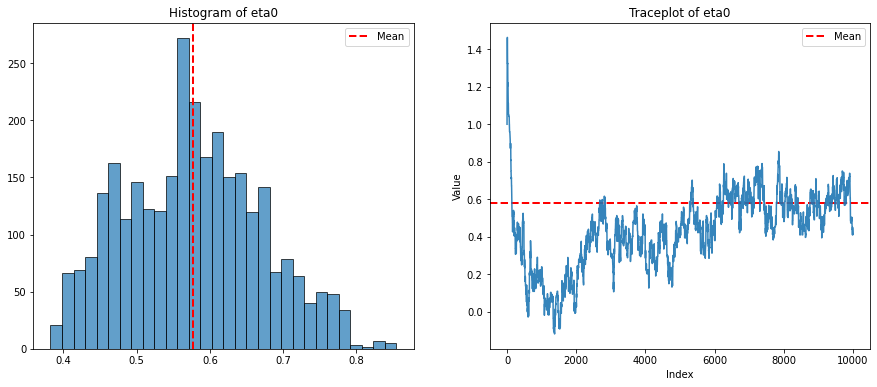

In [19]:
B = 7000 #Burn in

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,2,1)
plt.hist(Eta0[B:], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(Eta0[B:]), color='red', linestyle='--', linewidth=2,label='Mean')
plt.title('Histogram of eta0')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Traceplot of eta0')
plt.axhline(y=np.mean(Eta0[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Eta0, alpha = 0.9)
plt.legend()

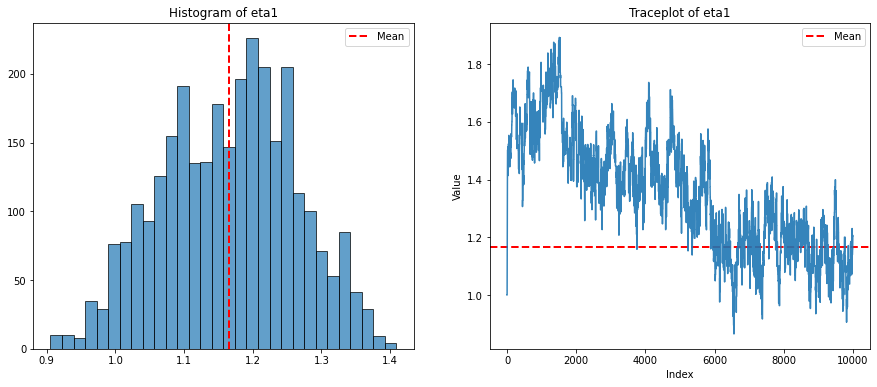

In [20]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,2,1)
plt.hist(Eta1[B:], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(Eta1[B:]), color='red', linestyle='--', linewidth=2,label='Mean')
plt.title('Histogram of eta1')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Traceplot of eta1')
plt.axhline(y=np.mean(Eta1[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Eta1, alpha = 0.9)
plt.legend()

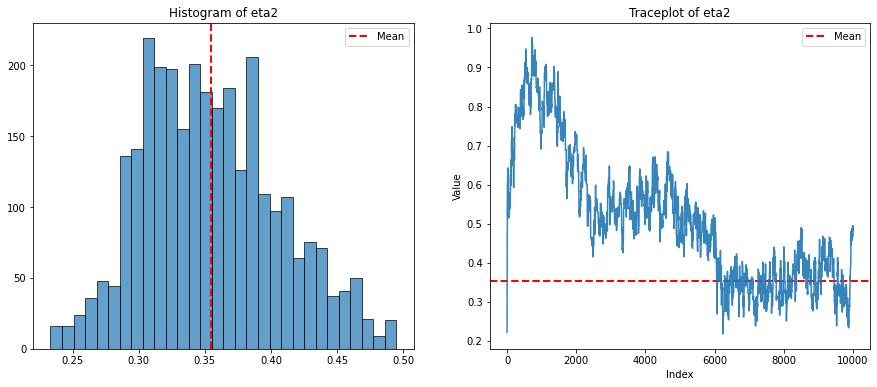

In [21]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,2,1)
plt.hist(Eta2[B:], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=np.mean(Eta2[B:]), color='red', linestyle='--', linewidth=2,label='Mean')
plt.title('Histogram of eta2')
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Traceplot of eta2')
plt.axhline(y=np.mean(Eta2[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Eta2, alpha = 0.9)
plt.legend()

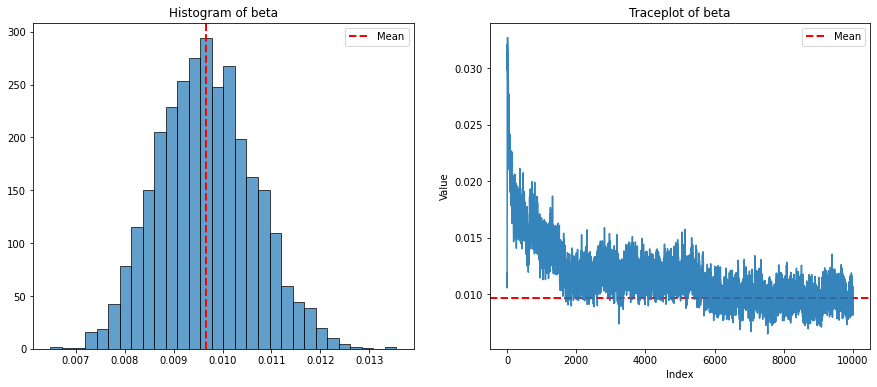

In [22]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,2,1)
plt.hist(Beta[B:], bins = 30, edgecolor='black', alpha=0.7)

plt.axvline(x=np.mean(Beta[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.title("Histogram of beta")
plt.legend()

ax = fig.add_subplot(1,2,2)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Traceplot of beta')
plt.axhline(y=np.mean(Beta[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Beta, alpha = 0.9)
plt.legend()



In [23]:
print(acc,acc2,acc3,acc4)

175553 2612 2384 2113


In [24]:
"""Vmcmc = []
V_mean = []
kernel = lambda x,y, mean: 1/(np.pi*(sd**2))*np.exp(-((x- mean[0])**2 + (y- mean[1])**2)/(sd**2))

def Lambda_dx(x,y,weight_mean):
    value = 0
    for m in range(np.size(weight_mean)):
        mean = punti_generatori[m]
        weight = weight_mean[m]
        #print(mean, weight, x,y)
        value = value + weight*kernel(x,y,mean)

    return value

x1 = np.linspace(X[0], X[1], 100)
y1 = np.linspace(Y[0], Y[1], 100)
X1,Y1 = np.meshgrid(x1, y1)

for t in range(T):
    fig = plt.figure(figsize=(20, 10))
    Vmcmc.append([Bv[t][:]*Dmcmc[t][:,m] for m in range(M**2)])
    V_mean.append([np.mean(Vmcmc[t][:][m]) for m in range(M**2)])

    # Tracciamento dei dati
    
    #plt.subplot(3, 1, 1)
    ax = fig.add_subplot(131, projection='3d')
    #ax.scatter(x, y, D_final, c='r', marker='x')
    ax.scatter(x, y, V_mean[t], c='orange', marker='x')
    #ax.scatter(x_obs, y_obs, np.zeros(np.size(x_obs)), c='g', marker='.')

    ax.scatter(obs_x_vector[t], obs_y_vector[t], np.zeros(Nt[t]), c='b', marker='.')

    for i in range(len(x)):
        #ax.plot([x[i], x[i]], [y[i], y[i]], [0, D_final[i]], color='blue', linestyle='--')
        ax.plot([x[i], x[i]], [y[i], y[i]], [0, V_mean[t][i]], color='green', linestyle='--')

    #plt.title("Plot of the coordinates of the fires \n with estimates for the weights of the latent process")

    Z = Lambda_dx(X1,Y1, V_mean[t])
    #plt.subplot(3, 1, 2)
    ax = fig.add_subplot(132, projection='3d')
    surf = ax.plot_surface(X1, Y1, Z, cmap='viridis')
    #plt.title("Surface plot of Lambda(E)")

    fig = plt.figure(figsize=(10, 8))
    plt.contourf(X1, Y1, Z, cmap='viridis', alpha=0.6)
    plt.colorbar()  # Aggiunta della barra dei colori
    plt.xlabel('X')
    plt.ylabel('Y')
    #plt.title('Contour Plot di Lambda(X)')
    plt.plot(obs_x_vector[t], obs_y_vector[t],"o",color='blue')
    #plt.title("Plot of the coordinates of the fires over the contour plot of Lambda(E)")
    plt.show()

"""
    
  

'Vmcmc = []\nV_mean = []\nkernel = lambda x,y, mean: 1/(np.pi*(sd**2))*np.exp(-((x- mean[0])**2 + (y- mean[1])**2)/(sd**2))\n\ndef Lambda_dx(x,y,weight_mean):\n    value = 0\n    for m in range(np.size(weight_mean)):\n        mean = punti_generatori[m]\n        weight = weight_mean[m]\n        #print(mean, weight, x,y)\n        value = value + weight*kernel(x,y,mean)\n\n    return value\n\nx1 = np.linspace(X[0], X[1], 100)\ny1 = np.linspace(Y[0], Y[1], 100)\nX1,Y1 = np.meshgrid(x1, y1)\n\nfor t in range(T):\n    fig = plt.figure(figsize=(20, 10))\n    Vmcmc.append([Bv[t][:]*Dmcmc[t][:,m] for m in range(M**2)])\n    V_mean.append([np.mean(Vmcmc[t][:][m]) for m in range(M**2)])\n\n    # Tracciamento dei dati\n    \n    #plt.subplot(3, 1, 1)\n    ax = fig.add_subplot(131, projection=\'3d\')\n    #ax.scatter(x, y, D_final, c=\'r\', marker=\'x\')\n    ax.scatter(x, y, V_mean[t], c=\'orange\', marker=\'x\')\n    #ax.scatter(x_obs, y_obs, np.zeros(np.size(x_obs)), c=\'g\', marker=\'.\')\n\n  

0.5771228528258169 1.1654832268760311 0.354481764627002


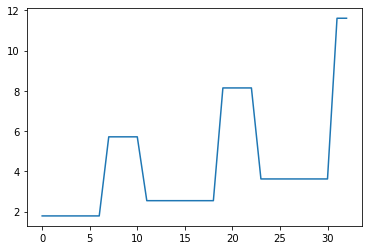

In [25]:
eta0mean = np.mean(Eta0[B:])
eta1mean = np.mean(Eta1[B:])
eta2mean = np.mean(Eta2[B:])

print(eta0mean, eta1mean, eta2mean)

t1 = np.arange(33)
f = [np.exp(eta0mean + I[t1]*eta1mean + A[t1]*eta2mean) for t1 in range(33)]

plt.plot(t1,f )

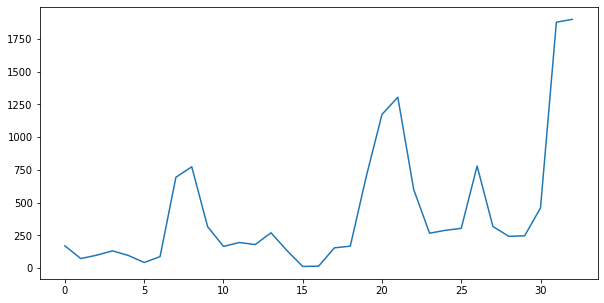

In [26]:
fig = plt.figure(figsize=(10, 5))
plt.plot(np.arange(33), [Nt[t] for t in range(T)])
plt.show()

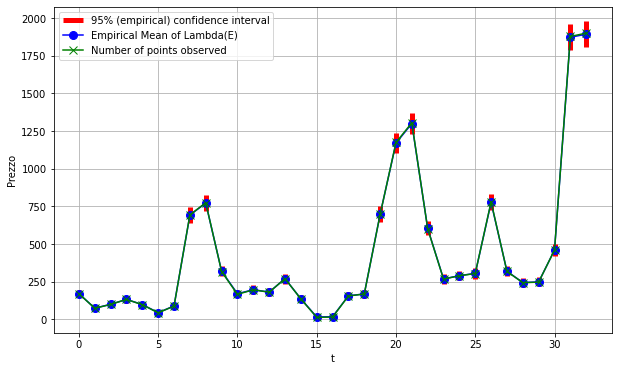

In [51]:
candles = [[np.percentile(Lambda_E[t][B:], 2.5), np.percentile(Lambda_E[t][B:], 97.5)] for t in range(T)]
means = [np.mean(Lambda_E[t][B:]) for t in range(T)]
observedvalue = Nt

fig, ax = plt.subplots(figsize=(10, 6))
candlesticks = ax.vlines(range(T), [c[0] for c in candles], [c[1] for c in candles], color='red', lw=5, label='95% (empirical) confidence interval')
ax.plot(range(T), means, marker='o', markersize=8, color='blue', label = "Empirical Mean of Lambda(E)")
ax.plot(range(T), Nt, marker='x', markersize=8, color='green', label = "Number of points observed")

plt.xlabel('t')
plt.ylabel('Prezzo')
plt.grid(True)
plt.legend()
plt.show()

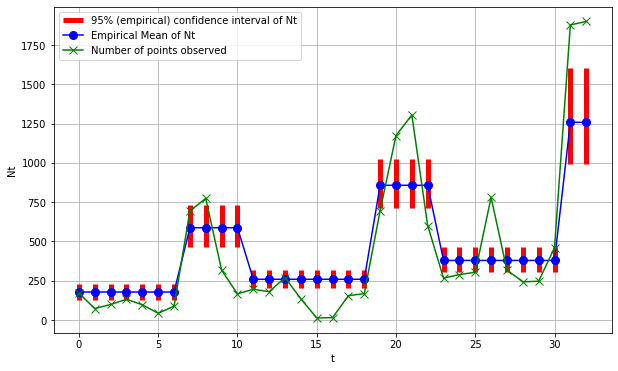

In [50]:
B = 5000

candles = [[np.percentile(Estimation_of_Nt[t][B:], 2.5), np.percentile(Estimation_of_Nt[t][B:], 97.5)] for t in range(T)]
means = [np.mean(Estimation_of_Nt[t][B:]) for t in range(T)]

fig, ax = plt.subplots(figsize=(10, 6))
candlesticks = ax.vlines(range(T), [c[0] for c in candles], [c[1] for c in candles], color='red', lw=5, label='95% (empirical) confidence interval of Nt')
ax.plot(range(T), means, marker='o', markersize=8, color='blue', label = "Empirical Mean of Nt")
ax.plot(range(T), Nt, marker='x', markersize=8, color='green', label = "Number of points observed")

plt.xlabel('t')
plt.ylabel('Nt')
plt.grid(True)
plt.legend()
plt.show()

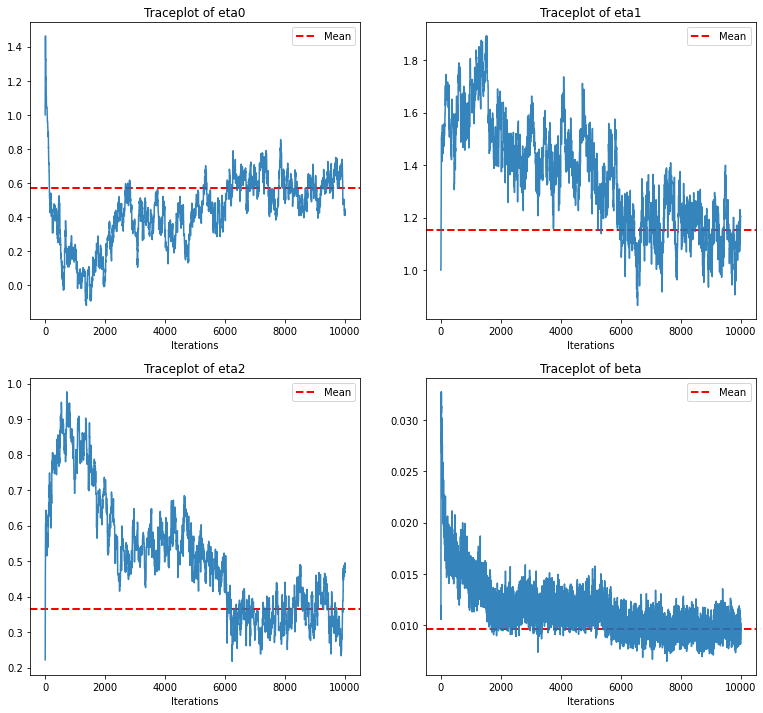

In [40]:
fig = plt.figure(figsize=(13, 12))

B = 8000

ax = fig.add_subplot(2,2,1)
plt.xlabel('Iterations')
plt.title('Traceplot of eta0')
plt.axhline(y=np.mean(Eta0[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Eta0, alpha = 0.9)
plt.legend()

ax = fig.add_subplot(2,2,2)
plt.xlabel('Iterations')
plt.title('Traceplot of eta1')
plt.axhline(y=np.mean(Eta1[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Eta1, alpha = 0.9)
plt.legend()


ax = fig.add_subplot(2,2,3)
plt.xlabel('Iterations')
plt.title('Traceplot of eta2')
plt.axhline(y=np.mean(Eta2[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Eta2, alpha = 0.9)
plt.legend()

ax = fig.add_subplot(2,2,4)
plt.xlabel('Iterations')
plt.title('Traceplot of beta')
plt.axhline(y=np.mean(Beta[B:]), color='red', linestyle='--', linewidth=2, label='Mean')
plt.plot(Beta, alpha = 0.9)
plt.legend()

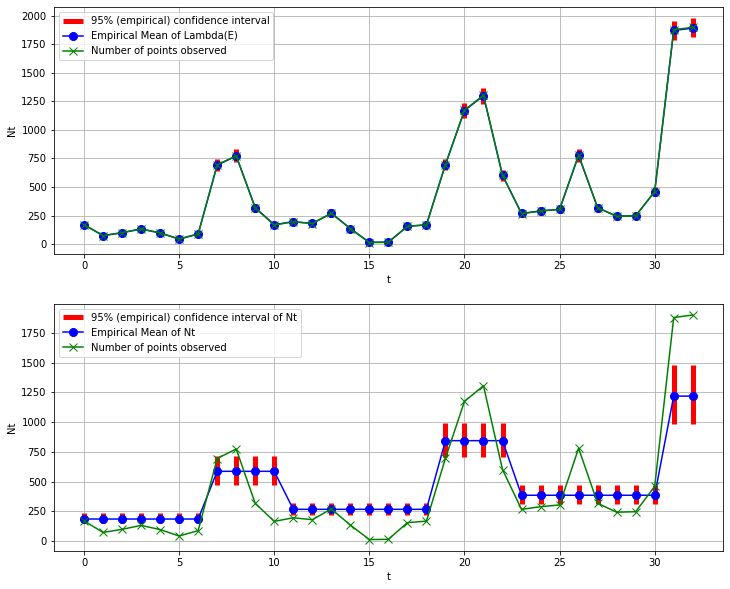

In [62]:
fig = plt.figure(figsize=(12, 10))

B = 8000

ax = fig.add_subplot(2,1,1)


candles = [[np.percentile(Lambda_E[t][B:], 2.5), np.percentile(Lambda_E[t][B:], 97.5)] for t in range(T)]
means = [np.mean(Lambda_E[t][B:]) for t in range(T)]
observedvalue = Nt


candlesticks = ax.vlines(range(T), [c[0] for c in candles], [c[1] for c in candles], color='red', lw=5, label='95% (empirical) confidence interval')
ax.plot(range(T), means, marker='o', markersize=8, color='blue', label = "Empirical Mean of Lambda(E)")
ax.plot(range(T), Nt, marker='x', markersize=8, color='green', label = "Number of points observed")

plt.xlabel('t')
plt.ylabel('Nt')
plt.grid(True)
plt.legend()

ax = fig.add_subplot(2,1,2)

candles = [[np.percentile(Estimation_of_Nt[t][B:], 2.5), np.percentile(Estimation_of_Nt[t][B:], 97.5)] for t in range(T)]
means = [np.mean(Estimation_of_Nt[t][B:]) for t in range(T)]

candlesticks = ax.vlines(range(T), [c[0] for c in candles], [c[1] for c in candles], color='red', lw=5, label='95% (empirical) confidence interval of Nt')
ax.plot(range(T), means, marker='o', markersize=8, color='blue', label = "Empirical Mean of Nt")
ax.plot(range(T), Nt, marker='x', markersize=8, color='green', label = "Number of points observed")

plt.xlabel('t')
plt.ylabel('Nt')
plt.grid(True)
plt.legend()
plt.show()
